# Índice
* [1. Teorema de Bayes e inferencia estadística](#1.-Teorema-de-Bayes-e-inferencia-estadística)
	* [1.1 Estadística Frecuentista vs Bayesiana](#1.1-Estadística-Frecuentista-vs-Bayesiana)
		* [1.1.1 El mundo según Bayes](#1.1.1-El-mundo-según-Bayes)
	* [1.2 Interpretación Bayesiana (_subjetiva_) de la probabilidad](#1.2-Interpretación-Bayesiana-%28_subjetiva_%29-de-la-probabilidad)
	* [1.3 El teorema de Bayes](#1.3-El-teorema-de-Bayes)
	* [1.4 Estadística Bayesiana en tres pasos.](#1.4-Estadística-Bayesiana-en-tres-pasos.)
	* [1.5 Estimación de parámetros](#1.5-Estimación-de-parámetros)
		* [1.5.1 el problema del diagnóstico](#1.5.1-el-problema-del-diagnóstico)
		* [1.5.2 El problema de la moneda](#1.5.2-El-problema-de-la-moneda)
	* [1.6 Elección del  _a priori_](#1.6-Elección-del--_a-priori_)
	* [1.7 Interpretación del  _posteriori_](#1.7-Interpretación-del--_posteriori_)


In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns

# 1. Teorema de Bayes e inferencia estadística

Lo más probable es que ustedes hayan tenido al menos un curso de estadística (ya sea en el grado o posgrado). Casi con seguridad dicho curso fue sobre métodos frecuentistas (aun cuando esto no haya sido explicitado). En este curso aprenderemos sobre otro paradigma en estadística llamado usualmente estadística Bayesiana. A lo largo del curso contrastaremos algunas de las diferencias y similitudes entre ambas aproximaciones a la estadística. Mucho se ha escrito sobre las ventajas y desventajas de cada aproximación. Es claro que quien escribe cree que son más las ventajas de la estadística Bayesiana que sus desventajas. De todas formas no entraremos en una discusion filosófico/matematica sobre el tema, si no que adoptaré una postura más pragmática tratando de focalizarme en como hacer estadística Bayesiana.

## 1.1 Estadística Frecuentista vs Bayesiana

Bajo cualquier paradigma estadístico encontraremos los siguientes elementos:

1. Algunas cantidades que son desconocidas, pero queremos conocer. Estas cantidades son llamadas **parámetros**
2. Algunas cantidades observadas y que sospechamos contienen información sobre los parámetros: Estas cantidades son llamadas **datos** 
3. Una (o más) construcciones matemáticas que relacionan los datos con los parámetros. Estos son los llamados **modelos**.

En un paradigma frecuentista los datos son considerados aleatorios. La razón es que cada vez que realizamos un experimento u observación obtenemos valores diferentes para los datos. Por el contrario se considera que existen valores verdaderos para los parámetros y que estos valores son fijos, es por ello que en estadística frecuentista las estimaciones se condicionan sobre los parámetros, es decir el modelo general en estadística frecuentista es:

$$f(y | \theta)\\$$


Donde el modelo $f$ acepta como argumentos los datos $y$ condicionados $|$ en valores particulares de $\theta$.

La inferencia frecuentista tipicamente involucra es uso de **estimatodes** para los parámetros desconocidos. Los estimadores son fórmulas que devuelven estimaciones como función de los datos. Los estimadores se eligen de acuerdo a diversos criterios de optimalidad. Como pueden ser  insesgadez, eficiencia, convergencia y robustez (consistencia).

Supongamos que hemos recolectado datos sobre la prevalencia de alguna enfermedad en una población dada. Hemos recolectado datos de $n$ pacientes de los cuales $y$ han sido diagnosticados con la enfermedad. Un estimador frecuentista de la prevalencia $p$ de dicha enfermedad será:

$$p = \frac{y}{n}$$

¿Por qué esta función en particular? Si bien la respuesta es tan intuitiva que parece *obvia* es posible justificar (rigurosamente) el uso de ese estimador ya que puede demostrarse que este estimador provee de una estimación no-sesgada y con minima varianza.

En el universo frecuentista cada vez que se quiere estimar una cantidad es necesario introducir nuevos estimadores.

### 1.1.1 El mundo según Bayes

En el universo Bayesiano los datos son considerados fijos. En el sentido que si bien alguna vez fueron aleatorios. Una vez que recolectados los datos no cambian! Los parámetros son considerados aleatorios, no por que necesariamente lo sean sino que la aleatoriedad es reflejo de nuestra incertidumbre sobre los valores que los parámetros pueden tomar. Por lo tanto podemos escribir

$$p(\theta | y)$$

Es decir la probabilidad de $\theta$ tome ciertos valores dado (condicionado en) los valores observados de $y$. En algún momento de la historia la estadistica Bayesiana recibió el nombre de **probabilidad inversa**, ya que infiere a partir de las observaciones los parámetros, o dicho de otra forma infiere los causas a partir de los efectos.

En estadística Bayesiana existe un solo estimador para todos los posibles casos. Este estimador se conoce como teorema de Bayes (o regla de Bayes o formula de Bayes). Antes de presentar este único estimador, repasemos un poco el concepto de probabiliad.

## 1.2 Interpretación Bayesiana (_subjetiva_) de la probabilidad

Las probabiliades son números entre 0 y 1 (incluyendo ambos extremos). En estadística Bayesiana las probabilidades son usadas para cuantificar la confianza que tenemos en que un evento ocurra. Desde este punto de vista es totalmente razonable preguntar cual es la probabilidad de que la masa de Saturno sea $X$, o hablar sobre la probabilidad de lluvia durante el 25 de Mayo de 1810, o la probabilidad de que mañana amanezca.

La lógica aristotélica permite razonar de forma correcta cuando los enunciados son verdaderos o falsos (cuando hay certezas). A fin de razonar, de forma correcta, en presencia de incertidumbre  es necesario extender la lógica aristotélica. En 1946, Richard Cox demostró que tal extensión es posible si asignamos probabilidades a los enunciados y si las probabilidades usadas respetan las conocidas reglas de la teoría de probabilidades:

La regla de la suma:
$$p(A) + p (\neg A) = 1$$ 

La regla del producto:
$$p(A, B) = p(A|B) \times p(B)$$ 

Siendo p(falso)= 0 y p(verdadero) = 1

Si no estamos seguros de la factibilidad de un evento, entonces es matemáticamente razonable asignar un valor entre 0 y 1, de acuerdo al grado de confianza que tenemos de que ocurra dicho evento. 

Dado que las probabilidades son una medida de la incerteza y no una propiedad de la naturaleza, distintas personas podrán asignar distintas probabilidades a un mismo evento. Por ello se suele decir que la estadística Bayesiana es subjetiva (y no como un cumplido!). Sin embargo, este uso de las probabilidades simplemente refleja un hecho trivial, distintas personas tienen distintas experiencias y creencias por lo que no necesariamente estarán de acuerdo en la factibilidad de un evento. Una persona que sabe que una moneda está sesgada hacia cara, maneja información distinta de otra que asume que una moneda tiene igual chance de caer cara o seca. De todas formas, si ambas personas hacen el experimento de arrojar esa moneda al aire varias veces, la probabilidad que cada uno asigna al _evento cara_ irá convergiendo a un mismo valor (aun si nunca coincide exactamente). Más adelante realizaremos tal experimento de forma computacional. Pero antes veamos el teorema de Bayes, que describe la forma matemáticamente correcta de actualizar nuestras creencias a la luz de nuevos datos.

## 1.3 El teorema de Bayes

Según la regla del producto tenemos que la probabiliad de que ocurra un evento A y uno B, si ambos son independientes, es igual al producto de sus probabilidades.

$$p(A, B) = p(A) \times p(B)$$ 

Pero ¿Qué pasa en cuando los eventos no son independientes? En es caso podes decir que:

$$p(A, B) = p(A|B) \times p(B)$$ 

$p(A|B)$ es lo que se conoce como probabilidad condicional y se lee _la probabilidad de $A$ dado $B$_. Y representa la probabilidad de que ocurra $A$ dado que sabemos $B$ (o _condicionado_ a que sabemos $B$). Ya estamos muy cerca del teorema de Bayes, pero detengamonos un segundo a contemplar el significado de una probabilidad condicional. Reordenando la ecuación anterior se ve que:

$$p(A|B) = \frac{p(A, B)}{p(B)}$$ 

Es decir $p(A|B)$ es la probabilidad de que ocurra $A$ y $B$ ($p(A, B)$), pero renormalizado (dividido) por $p(B)$. ¿Por qué dividimos por $B$? Debido a que conocer $B$ equivale a decir que el espacio total de posibilidades se ha reducido a $B$. ¿Cuál es la probabilidad de arrojar un dado y obtener 1? $\frac{1}{6}$ (asumiendo un dado no trucado) y ¿Cuál es la probabilidad de arrojar un dado y obtener 1 dado que he obtenido un número impar? $\frac{1}{3}$ (asumiendo nuevamente un dado no trucado). De hecho es posible asegurar que:

$$P(A|B) >= P(A)$$

Si $B$ aporta información sobre $A$ (obtuve un número impar), entonces $P(A|B) > P(A)$. Si el saber $B$ no aporta ninguna informacion sobre $A$ (las rosas son rojas), entonces $P(A|B) = P(A)$. En este último caso tendremos que ambas variables son independientes entre si y podemos escribir nuevamente.

$$p(A, B) = p(A) \times p(B)$$


Luego de este pequeño descanso en la probabilidad condicional sigamos neustro camino. El teorema de Bayes es una consecuencia directa de la regla del producto, veamos.

$$p(H,D) = p(H|D) \times p(D)$$
$$p(D,H) = p(D|H) \times p(H)$$

y dado que 

$$p(H,D) = p(D,H)$$

Podemos escribir que

$$p(H|D) \times p(D) = p(D|H) \times p(H)$$

Reordenando llegamos al teorema de Bayes (o regla de Bayes)

$$p(H|D) = \frac{p(D|H) p(H)}{p(D)}$$

Esta ecuación (de aspecto, casi trivial) es invaluable por que nos permite relacionar la probabilidad $p(H|D)$ con $p(D|H)$. Si reemplazamos $H$ por _hipótesis_ y $D$ por _datos_ creo que empieza a generarse cierta intuición acerca de la importancia del teorema de Bayes en ciencia.

Cada término del teorema de Bayes tiene un nombre específico:

* $p(H|D)$: _posterior_ 
* $p(D|H)$: _likelihood_ (_verosimilitud_)
* $p(H)$: _a priori_
* $p(D)$: _evidencia_

El _a priori_ representa nuestro conocimiento (o ignorancia!) sobre la plausibilidad de nuestra hipótesis antes de analizar los datos. Esta es la parte que le da la _subjetividad_ a la estadística Bayesiana. En muchos problemas científicos (y de otra índole) es posible contar con mucha información _objetiva_ que puede usarse como _a priori_, como medidas experimentales previas o límites impuesto por alguna teoría. 

El _likelihood_ es la forma de incluir nuestros datos en el análisis.

El _posterior_ representa la plausibilidad de nuestra hipótesis a la luz de los datos (y del _a priori_). Puede pensarse como una versión actualizada del _a priori_. 

La _evidencia_ es la probabilidad de observar los datos $D$ dado todas las posibles hipótesis $H$. Si la oración anterior no es muy clara, no hay problema ya veremos ejemplos que clarificarán este concepto. En general, la _evidencia_ puede ser vista como una simple constante de normalización que en muchos problemas prácticos puede (y suele) omitirse sin perdida de generalidad. Por lo que el teorema de Bayes suele aparecer escrito como

$$p(H|D) \propto p(D|H) p(H)$$


El rol de todos estos términos irá quedando más claro a medida que avancemos.

## 1.4 Estadística Bayesiana en tres pasos.

El teorema de Bayes es el único estimador usado en estadística Bayesiana. Lo que hace, al menos en principio, sea conceptualmente simple de usar. Según Gelman et al. (2013) la estadística Bayesiana se reduce a tres pasos:

1. Generar un modelo probabilístico usando el teorema de Bayes. Esto incluye asignar distribuciones de probabilidad a los datos, parámetros desconocidos, datos faltantes, etc.
2. Condicionar el modelo a los datos observados a fin de obtener el _a posteriori_. En general, salvo algunas cosas simples, esto debe resolverse por métodos numéricos.
3. Evaluar el ajuste del modelo generado a los datos y evaluar las implicancias del modelo. Este paso no es exclusivo de la estadística Bayesiana si no que es generar de cualquier ejercicio de modelado de un problema. En general uno debe evaluar si el modelo ajusta efectivamente a los datos generados, si las conclusiones obtenidas tienen sentido dado el marco conceptual en el que uno trabaja, cuan sensibles son los resultados a las detalles del modelo (sobre todo a detalles para los cuales no tenemos demasiada información). En definitiva una evaluacion lo mas crítica posible de los propios resultados.

Durante el resto del curso iremos discutiendo y recorriendo cada uno de estos pasos. El primer paso es quizá el más complicado de todos, en lo que resta de este capítulo veremos como obtener el _a posterioris_ de forma analítica, pero a partir del próximo capítulo lo haremos de forma computacional gracias a PyMC3. A medida que crezca la complejidad de nuestros modelos veremos como el último punto toma cada vez mayor importancia y veremos en hasta cierto punto la posibilidad (y necesidad) de evalluar los modelos generados reduce la dificultad del punto 1, ya que no es necesario generar el "mejor modelo posible" en un solo paso.

## 1.5 Estimación de parámetros

### 1.5.1 el problema del diagnóstico

### 1.5.2 El problema de la moneda

A juzgar por la cantidad de ejemplos sobre monedas arrojadas al aires en libros de estadística y probabilidad, pareciera que las monedas son un elementro central de estas disciplinas, algo de cierto hay. Una de las razones detrás de la ubiquidad de este ejemplo es que las monedas son elementos cotidianos, otra razón es que su comportamiento puede ser modelado de forma simple. Otra razón es que lo que vale para el ejemplo de monedas vale para muchas otras situaciones

En el siguiente ejemplo intentaremos estimar la factibiliad de que una moneda este sesgada, es decir que la probabilidad de que caiga cara (o ceca) sea distinta de 0.5. Para ello arrojaremos (computacionalmente) dicha moneda al aire 500 veces. Llevaremos registro del resultado en la varible $y$. Siendo $y$ la cantidad de caras obtenidas en un experimento.

Según el teorema de Bayes,

$$p(\theta|y) \propto p(y|\theta) p(\theta)$$

Donde $\theta = 1$ quiere decir 100% cara y $\theta = 0$ 100% ceca. 

El _a priori_ lo modelaremos usando una distribución beta y el _likelihood_ una distribución binomial.

Hay varias razones para usar una distribución beta para este (y otros) problemas. Uno de ellos es que la distribución beta varía entre 0 y 1, de igual forma que nuestra creencias sobre los posibles valores que puede tomar $\theta$. Otra razón es su versatilidad para expresar distintas situaciones. Supongamos que el experimento de la moneda es realizado por tres personas. Una de ellas dice no saber nada de la moneda por lo tanto _a priori_ todos los valores de $\theta$ son igualmente creibles. La segunda persona desconfía de la moneda ya que sospecha que es una moneda trucada por lo que lo más probable es que esté sesgada, pero no sabe si hacia cara o hacia ceca. Por último, la tercer persona asegura que lo más probable es que $\theta$ tome un valor alrededor de 0.5 ya que según su experiencia así se comportan las monedas. Todas estas situaciones pueden ser modeladas por la distribucion beta, como se ve a continuación.

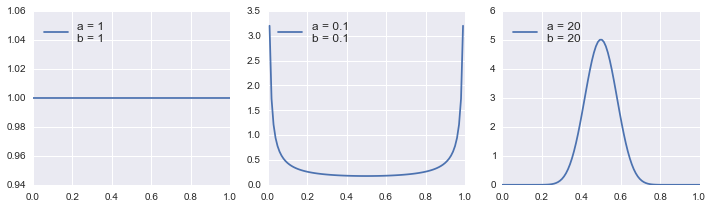

In [2]:
plt.figure(figsize=(10, 3))
x = np.linspace(0, 1, 100)

for ind, (a, b) in enumerate([(1, 1), (0.1, 0.1), (20, 20)]):
    y = stats.beta.pdf(x, a, b)
    plt.subplot(1, 3, ind+1)
    plt.plot(x, y, label='a = %s\nb = %s' % (a, b));
    plt.legend(loc=2, fontsize=12)
plt.tight_layout()

Asumiendo que el resultado obtenido al arrojar una moneda no influye en el resultado de posteriores experimentos (es decir los experimentos son independientes entre si) es razonable utilizar como likelihood la distribución binomial.

$$p(y|\theta) = {n \choose y} \theta^y (1 - \theta)^{N−y}$$

Donde N es la cantidad total de experimentos (modenas arrojadas al aire) e $y$ es la cantidad de caras obtenidas. A los fines prácticos podriamos simplificar la igualdad anterior y convertirla en una proporcionalidad, eliminando el término {n \choose y} ya que ese término no depende de $\theta$ que es lo que nos interesa averiguar. Por lo que podríamos establecer que:

$$p(y|\theta) \propto \theta^y (1 - \theta)^{N−y}$$

La elección de esta distribución para modelar nuestro problema es razonable ya que $\theta$ es la chance de obtener una cara al arrojar una moneda y ese hecho ha ocurrido $y$ veces, de la misma forma $1-\theta$ es la chance de obtener una seca y lo cual a sido observado $N-y$ veces.

Se puede demostrar que siempre que usemos como a priori una función beta y como likelihood una distribución binomial obtendremos como resultado una distribución beta, cuyos parámetros serán:

$$\alpha_{posteriori} = \alpha_{a priori} + y$$
$$\beta_{posteriori} = \beta_{a priori} + N - y$$

Cuando se cumple que dado un _likelihood_ la forma funciona del _a priori_ y la del _a posteriori_ coinciden se dice que el _a priori_ es conjugado con el _likelihood_. Historicamente los problemas en estadística bayesiana estuvieron restringidos al uso de _a prioris_ conjugados, ya que estos garantizan la tractabilidad matemática del problema, es decir garantizan que es posible obtener una expresión analítica para nuestro problema. En el próximo capítulo veremos como técnicas computacionales modernas permiten lidiar obtener _a posterioris_ incluso cuando no se usan _a prioris_ conjugados.

En el siguiente ejemplo exploraremos como cambian las distribuciones _a posteriori_ para distinto número de experimentos (n_intentos) y partiendo de 3 *a priori* diferentes.

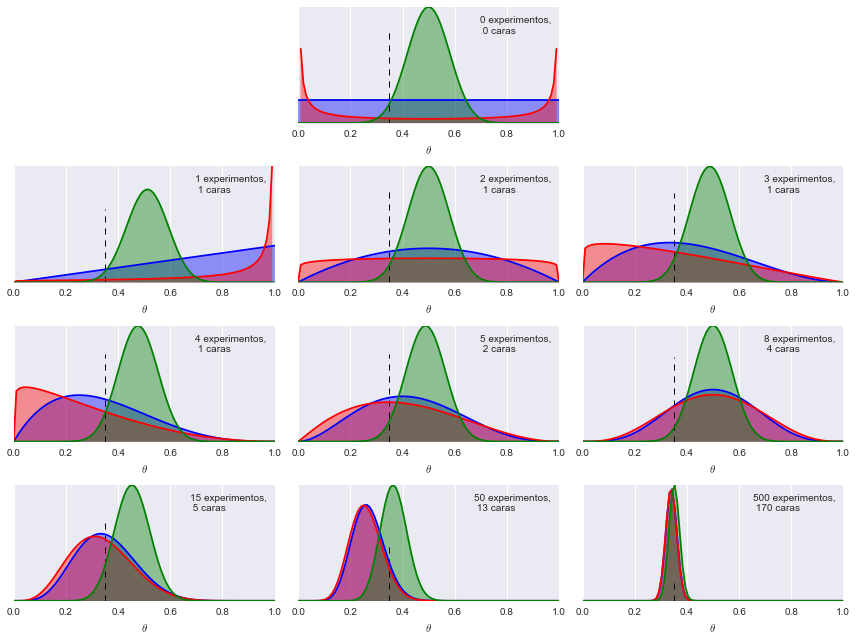

In [3]:
plt.figure(figsize=(12, 9))

np.random.seed(123)
dist = stats.beta
n_intentos = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
theta_real = 0.35  # en una situación real este valor es desconocido
datos = stats.bernoulli.rvs(theta_real, size=n_intentos[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_intentos):
    if k == 0:
        sx = plt.subplot(4,3, 2)
    else:
        sx = plt.subplot(4,3, k+3)
    plt.xlabel(r"$\theta$") 
    plt.gca().axes.get_yaxis().set_ticks([])
    heads = datos[:N].sum()
    # a priori uniforme
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, color="blue")
    plt.fill_between(x, 0, y, color="blue", alpha=0.4)
    # a priori para una moneda sesgada
    y = dist.pdf(x,  0.1 + heads, 0.1 + N - heads)
    plt.plot(x, y, color="red")
    plt.fill_between(x, 0, y, color="red", alpha=0.4)
    # a priori para una moneda no sesgada
    y = dist.pdf(x, 20 + heads,  20 + N - heads)
    plt.plot(x, y, color="green")
    plt.fill_between(x, 0, y, color="green", alpha=0.4)
    
    plt.vlines(theta_real, 0, 4, color="k", linestyles="--", lw=1)
    plt.plot(0, 0, label="%d experimentos,\n %d caras" % (N, heads), alpha=0)
    plt.xlim(0,1)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.tight_layout()

La primer figura del panel muestra los *a priori*, nuestra estimación del problema dado que no hemos realizado ningún experimento. Las sucesivas nueve figuras muestras las distribuciones *a posteriri* y se indica la cantidad de experimentos y de caras obtenidas.

Este ejemplo es realemente ilustrativo en varios aspectos.

* Dada una cantidad *suficiente* de datos los resultados tienden a converger sin importar el *a priori* usado
* La rapidez con la que los resultados converjen varía. En este ejemplo las curvas azul y roja parecen converger con tan solo 8 experimentos, pero se necesitan más de 50 experimentos para que las tres curvas se muestren similares. Aún con 500 experimentos se observan ligeras diferencias.
* La dispersión o ancho de las curvas es una medida de la incertidumbre de un resultado.
* Aún cuando $\frac{2}{1} = \frac{8}{4}$ son numéricamente iguales tenemos menor incertidumbre en un resultado cuando el número de experimentos es mayor.
* Partiendo de los a priori unifome (azul) o sesgado (rojo) y habiendo realizado un solo experimento y observado una sola cara, lo más razonable es pensar que estamos frente a una moneda con dos caras!
* La situación cambia drasticamente al ver una ceca. Ahora lo más probable (dado cualquiera de los tres *a prioris*) es inferir que la moneda no está sesgada. Los valores de \theta exactamente 0 o 1 se vuelven imposibles
* El a priori no sesgado (verde) es más informativo que los otros dos (la distribución esta más concentrada), por ello se requiere de un número mas grande de experimentos para "moverlo"

## 1.6  Influencia y elección del _a priori_

De los ejemplos anteriores debería quedar claro que los _a priori_ influencian los resultados de nuestros cálculos. Esto tiene total sentido si no fuese así no haría falta incluirlos en el análisis y todo sería más simple (pero no necesariamente mejor). De los ejemplos anteriores también debería quedar claro que a medida que aumentan los datos (como las tiradas de monedas) los resultados son cada vez menos sensibles al _a priori_. De hecho, para una cantidad infinita de datos el _a priori_ no tiene ningún efecto. Exactamente cuantos datos son necesarios para que el efecto del _a priori_ sea despreciable varía según el problema y los modelos usados. En el ejemplo de la moneda se puede ver que 50 experimentos bastan para hacer que dos de los resultados sean prácticamente indistinguibles, pero hacen falta 500 experimentos para que los 3 resultados se vuelvan _casi_ independientes del _a priori_.

En casos en que los datos son pocos el _a priori_ tiene un mayor peso relativo en el resultado, esto puede ser ventajoso en caso que contemos con _a prioris_ confiables (basados en información previa proveniente de experimentos, observaciones, teorías o simulaciones). 

Cuando se discute sobre los _a prioris_ se suele hablar de tres tipos, según la información que contengan:

* Informativos: Son *a prioris* que imponen restricciones importantes sobre los valores que pueden tomar los parámetros. Solo deben ser usados en casos que provegan de información previa confiable (EJEMPLOS). Históricamente el uso de _a prioris_ informativos ha sido visto como problemático ya que se los ha asociado con la incorporación de _subjetividades_, ya que diferentes personas pueden usar distintos _a prioris_ ya que pueden contar con distinta información o con distintas interpretaciones de la misma información. 

* No-informativos: Son _a prioris_ que restringen los menos posible los valores que pueden tomar los datos, bajo ciertas condiciones un a priori uniforme es no-informativo, pero esto no es necesariamente cierto en todos los casos, un a priori de Jeffrey puede ser menos informativo que uno uniforme, pero obtener este tipo de a priori (dado nuestro problema) no siempre es fácil (o posible). Este tema es algo complejo y no lo veremos en el curso. Se suele decir que los priori no-informativos son _objetivos_. 

* Ligeramente informativos: En general los a priori no-informativos no existen (o son difíciles de obtener para problemas complejos). Por lo que varios autores opinan que es mejor hablar (y usar) a prioris ligeramente informativos. La distinción no es solo semántica. Quienes sostienen que es conveniente usar a prioris ligeramente informativos sostienen que la idea general de un a priori es la de regularizar nuestro modelo, es decir restringirlo de forma tal que se evite la posibilidad de obtener valores que carecen de sentido, por ejemplo números negativos si estamos midiendo distancias o en general valores fuera de ciertos rangos que sabemos imposibles (o que sabemos improbables). 

Entonces, como elegir los a prioris? Bueno esto depende del problema que pretendemos resolver. Si disponemos de un a priori informativo que creemos confiable entonces lo más razonable es usarlo. La estadística Bayesiana (como cualquier forma de modelado) implica tomar decisiones y la elección del a priori es solo una de ellas, hay muchas otras decisiones (que puede considerarse más o menos *subjetivas*) involucradas en ciencia, empezando por la elección de las preguntas que una intenta contestar, los datos y métodos que decide usar etc. Empeñarse en que el a priori deba ser lo más objetivo posible es un sinsentido ya que implica ignorar información a nuestra disposición en nombre de un supuesto ideal de objetividad. El objetivo de la ciencia debería ser el de dar respuestas lo más razonables posibles dados los datos a nuestro alcance. La ciencia es objetiva en el sentido que intenta obtener resultados reproducibles e independientes del observador y es subjetiva en el sentido que para lograr ese fin es necesario tomar varias decisiones individuales.

En caso de no disponer de a prioris informativos, es buena idea usar a prioris ligeramente informativos. En general los a prioris no-informativos no son una buena idea por que pueden ser difícil (si no imposible) encontrar y en general para la mayoría de los problemas alguna idea (aunque sea vaga) tenemos sobre el problema y es posible incorporar esa información en nuestro análisis via los a prioris.  Además, ¿Dónde está la objetividad en usar un a priori no-informativo que permite valores que sabemos imposibles?

Como veremos más adelante la estadística Bayesiana (como cualquier forma de modelado y por extensión cualquier forma de ciencia) es un proceso iterativo en el cual es necesario contrastar los resultados derivados de el modelo generado con los datos que tenemos a dispocisión. En muchos casos eso implicará cambiar partes del modelo, por ejemplo empezar con un a priori ligeramente informativo, para luego usar uno informativo o incluso comparar resultados usando más de un a priori. 

Por ultimo, es importante remarcar que es deseable dejar en claro los supuestos de los modelos que usamos en ciencia, especificar un a priori es simplemente especificar nuestros supuestos y someterlos a escrutiño de terceros.

## 1.7 Interpretación del  _posteriori_

El resultado de un análisis Bayesiano es siempre una distribución de probabilidad. En el caso de la moneda esto es evidente, y en el caso del diagnostico es menos claro ya que la distribución es discreta y solo puede tomar dos valores.

A la hora de comunicar los resultados de un análisis Bayesiano se puede resumir un el resultado a un solo valor. Por ejemplo reportando la media (o mediana o la moda) de la distribución _a posteriori_. Algo un poco más informativo (si no se puede graficar la distribución completa) es reportar además un intervalo de credibilidad, es común reportar los valores que encierran el 90% o 95% de la distribución.

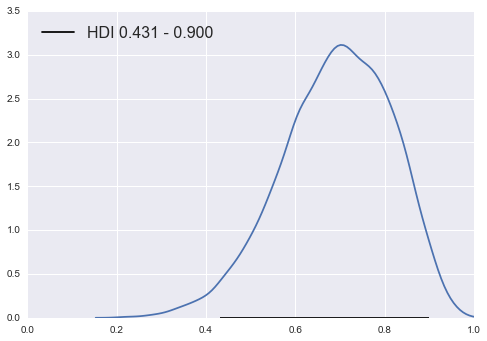

In [4]:
post = dist.rvs(9, 4, size=10000)  # un a posteriori sintético
sns.kdeplot(post)

HDI = np.percentile(post, [2.5, 97.5])
plt.hlines(0, *HDI, label='HDI %.3f - %.3f' % (HDI[0], HDI[1]))
plt.xlim(0, 1)
plt.legend(loc=2, fontsize=16);

In [5]:
import sys, IPython, scipy, matplotlib, platform
print("Esta notebook fue creada en una computadora %s corriendo %s y usando:\nPython %s\nIPython %s\nNumPy %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__))

Esta notebook fue creada en una computadora x86_64 corriendo Ubuntu 15.04 y usando:
Python 2.7.9
IPython 4.0.0
NumPy 1.8.2
SciPy 0.14.1
Matplotlib 1.4.2
Seaborn 0.6.0

